<a href="https://colab.research.google.com/github/sirat15/Traffic-Signals-Classification/blob/master/Traffic_Signs_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
import cv2
import numpy as np
import pandas as pd
import pickle
import random

In [35]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

fatal: destination path 'german-traffic-signs' already exists and is not an empty directory.


In [36]:
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [37]:
data = pd.read_csv('german-traffic-signs/signnames.csv')
data

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


In [38]:
with open("german-traffic-signs/train.p", mode = "rb") as training:
  train = pickle.load(training)

with open("german-traffic-signs/test.p", mode = "rb") as testing:
  test = pickle.load(testing)

with open("german-traffic-signs/valid.p", mode = "rb") as validation:
  valid = pickle.load(validation)  

In [39]:
x_train, y_train = train['features'], train['labels']
x_validation, y_validation = valid['features'], valid['labels']
x_test, y_test = test['features'], test['labels']

In [40]:
print(x_train.shape)
print(x_validation.shape)
print(x_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


image label = 31


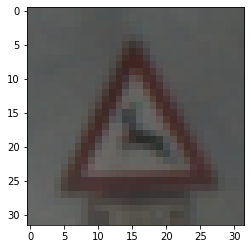

In [41]:
index = np.random.randint(1, len(x_train))
plt.imshow(x_train[index])
print("image label = {}".format(y_train[index]))

In [42]:
x_train , y_train = shuffle(x_train,y_train)

In [43]:
def preprosessing(img):
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img = cv2.equalizeHist(img)
  img = img/255
  return img

In [44]:
x_train_processed = np.array(list(map(preprosessing,x_train)))
x_validation_processed = np.array(list(map(preprosessing,x_validation)))
x_test_processed = np.array(list(map(preprosessing,x_test)))
x_train_processed.shape

(34799, 32, 32)

In [45]:
x_train_processed = x_train_processed.reshape(34799, 32, 32, 1)
x_validation_processed = x_validation_processed.reshape(4410, 32, 32, 1)
x_test_processed = x_test_processed.reshape(12630, 32, 32, 1)

In [46]:
x_train_processed.shape

(34799, 32, 32, 1)

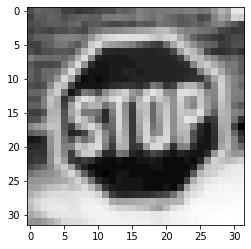

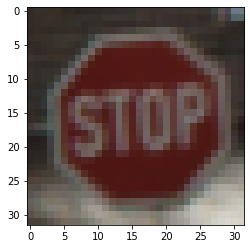

In [74]:
i = random.randint(1,len(x_train))
plt.imshow(x_train_processed[i].squeeze(),cmap='gray')
plt.figure()
plt.imshow(x_train[i].squeeze())

In [48]:
model = Sequential()
model.add(Conv2D(32, (5,5), activation='relu', input_shape=(32,32,1)))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))

model.add(Conv2D(64, (5,5), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(43,activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        51264     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)              

In [49]:
model.compile(Adam(lr= 0.0001),loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [50]:
history = model.fit(x_train_processed,
                    y_train,
                    batch_size=500,
                    epochs =50,
                    verbose = 1,
                    validation_data=(x_validation_processed,y_validation))

Epoch 1/50
70/70 [==============================] - 1s 15ms/step - loss: 3.5660 - accuracy: 0.0568 - val_loss: 3.5053 - val_accuracy: 0.1508
Epoch 2/50
70/70 [==============================] - 1s 13ms/step - loss: 3.3621 - accuracy: 0.1237 - val_loss: 3.2273 - val_accuracy: 0.2878
Epoch 3/50
70/70 [==============================] - 1s 13ms/step - loss: 2.9608 - accuracy: 0.2518 - val_loss: 2.6940 - val_accuracy: 0.3585
Epoch 4/50
70/70 [==============================] - 1s 13ms/step - loss: 2.4941 - accuracy: 0.3529 - val_loss: 2.2311 - val_accuracy: 0.4392
Epoch 5/50
70/70 [==============================] - 1s 13ms/step - loss: 2.1312 - accuracy: 0.4250 - val_loss: 1.8756 - val_accuracy: 0.5052
Epoch 6/50
70/70 [==============================] - 1s 13ms/step - loss: 1.8664 - accuracy: 0.4736 - val_loss: 1.6191 - val_accuracy: 0.5594
Epoch 7/50
70/70 [==============================] - 1s 13ms/step - loss: 1.6650 - accuracy: 0.5173 - val_loss: 1.4244 - val_accuracy: 0.6113
Epoch 8/50
70

In [51]:
score = model.evaluate(x_test_processed,y_test)
print("Test accuracy: ",score[1])

395/395 [==============================] - 1s 2ms/step - loss: 0.3585 - accuracy: 0.9053
Test accuracy:  0.9053048491477966


In [52]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'Epochs')

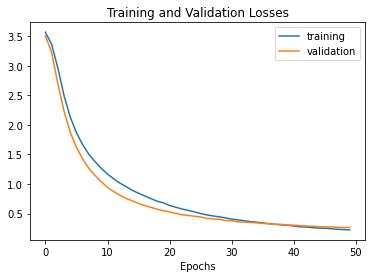

In [53]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Training and Validation Losses')
plt.xlabel('Epochs')


Text(0.5, 0, 'Epochs')

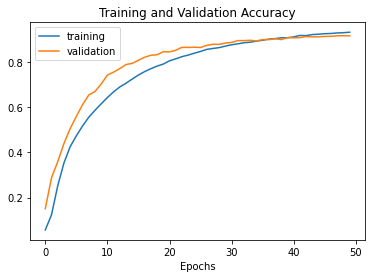

In [54]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')

In [55]:
prediction = model.predict_classes(x_test_processed)
y_true_label = y_test


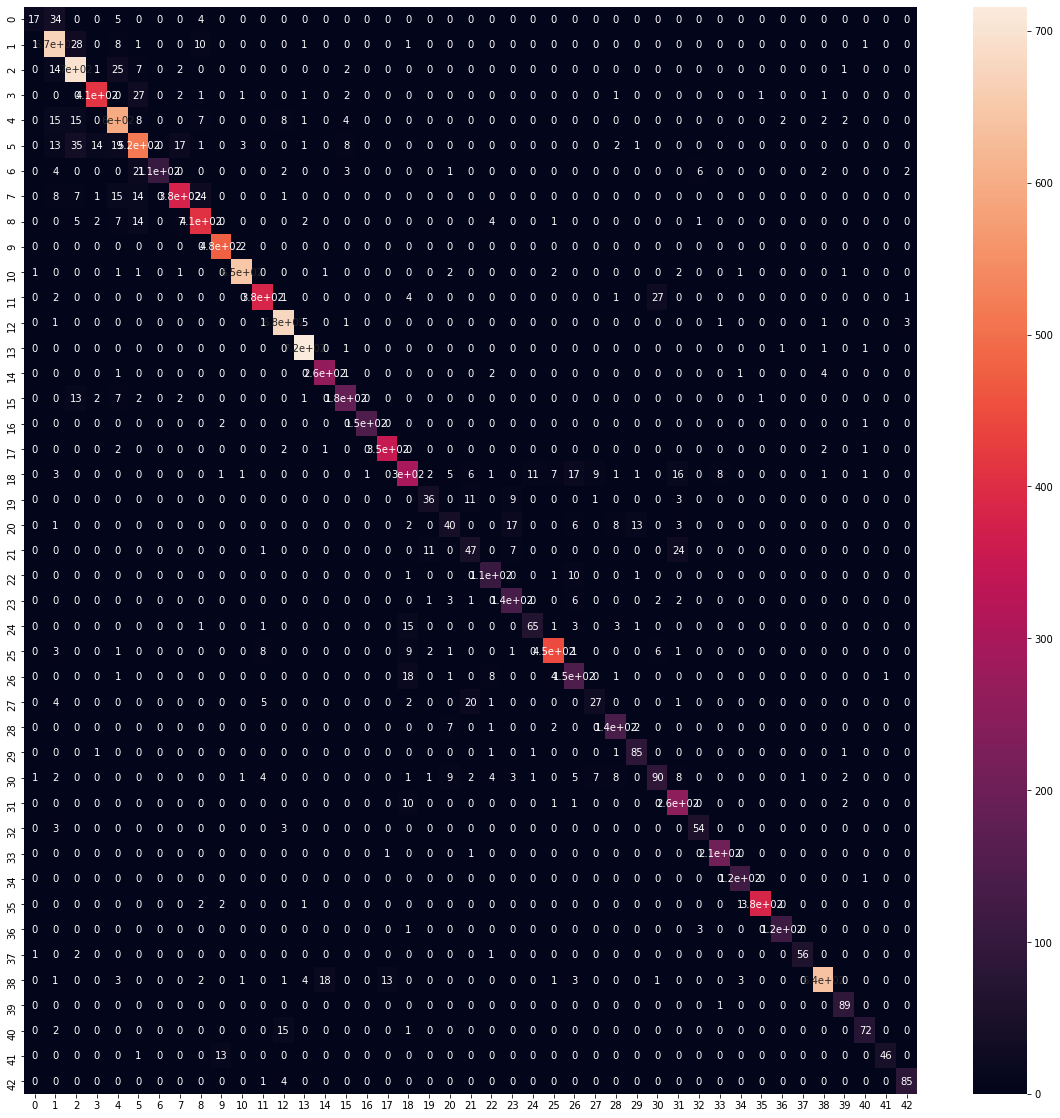

In [56]:

matrix = confusion_matrix(y_true_label,prediction)
plt.figure(figsize=(20,20))
sns.heatmap(matrix,annot=True)

Text(0.5, 1.0, 'Prediction=4\n True=4')

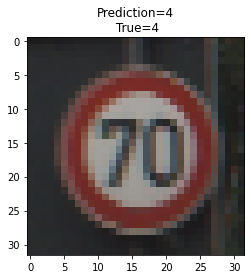

In [88]:
#L= 6
#W = 6
#fig, axes = plt.subplots(L,W,figsize=(12,12))
#axes = axes.ravel()
#for i in range(0, L*W):
#  axes[i] = plt.imshow(x_test[i])
#  axes[i] = plt.title('Prediction={}\n True={}'.format(y_true_label[i],prediction[i]))
#  axes[i] =  plt.axis('off')

#plt.subplots_adjust(wspace=1)
i = random.randint(1,len(x_test))
plt.imshow(x_test[i].squeeze())
plt.title('Prediction={}\n True={}'.format(y_true_label[i],prediction[i]))